# 1. Visualizaing aspects of NN training 
In this notebook, we’re going to ask you to do 3 types of simple visualizations surrounding the training of your NNs.

### 1. Data visualization 
In this step, we’re going to examine our training data. This code is largely written for you, as an example.
It’s important to examine your data before you start training your models on it, so that you have a good idea of what kind of data your working on, and what kinds of errors you should look out for.

### 2. Training Visualization 
In the second step, we’re going to visualize the training and valida- tion losses of our models as we train them.
This is a very important aspect of training deep models. Looking at a graph of these 2 losses can tell you a lot about how well your model is learning what you want it to.

### 3. Hyperparameter Visualization 
The last step of visualization is hyperparameter search. There are many, many hyperparameters in a typical DNN. How do we know which values to set
for each of these parameters?

The short answer is, there’s really no good answer. The best we can do is run the model multiple times on different values, and pick the ones that do the best on our development data.

Here, we’ll take turns fixing all of our hyperparameters except one, and examining how our perfor- mance changes as we change that one parameter. Ideally, to be confident in our results, we should get a “U” shape (for scalar parameters), which indicates we’ve examined the full span of which values work for that hyperparameter, when the other values are fixed.


## 1. Visualizing Our Data 

In [3]:
# imports
from collections import defaultdict 
import numpy as np
from data import load
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
# Load the data
data, labels = load(path='./release-data', split='train') # TODO: Make this point to the correct data directory.
dev_data, dev_labels = load(path='./release-data', split='dev') # TODO: Make this point to the correct data directory. 

### 1.1 The Label Distribution 
The first thing we’ll examine is our training set label distribution. We’d like to know what our training set looks like, and how it compares to the distribution of our validation set.
If things don’t look very similar, we might have a domain mismatch. Adapting models trained from a different domain that what they’re being evaluated on is a very active area of research, currently.

<BarContainer object of 10 artists>

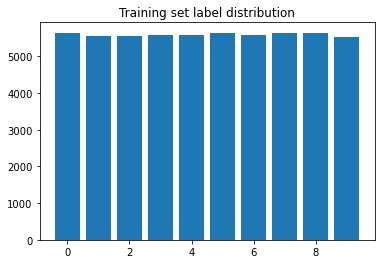

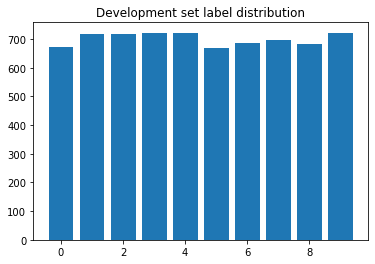

In [7]:
counts = defaultdict(int) 

for label in labels:
  counts[label] += 1 
plt.figure()

plt.title("Training set label distribution") 

k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int) 

for label in dev_labels:
  dev_counts[label] += 1 
plt.figure()
plt.title("Development set label distribution") 
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

 Luckily, our label distribution looks fairly even across train and dev, so we won’t worry about domain adaptation techniques. We’ll just train our models assuming that the training and test distributions are equal.

### 1.2 Visualizing our data
Next, let’s visualize some of our data points. Since the dataset we’re working on is a vision dataset, we can actually look at our data as images.
Let’s take a look at one example for each label that we have.

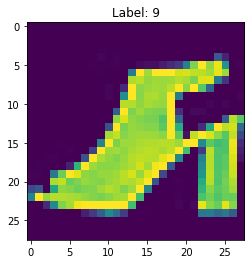

In [8]:
# Plot some examples of the data
for label in range(10):
  for i in range(len(labels)):
    if int(labels[i]) == label: 
      label_idx = i
      break

plt.figure()
plt.title(f"Label: {label}")
ex = np.array(data[label_idx], dtype=float) 
plt.imshow(ex.reshape((28,28)))

## 2. Visualizing our model’s learning
An important aspect of training DNN models is visualizing the training and development loss as our models train, as well as the accuracies.
These graphs can tell us a lot about how well our models are doing. For instance, if we see that our training loss is going down, but our dev loss starts going up, we know that we are overfitting and we should have stopped training.
The framework we’ve given you for training models logs dev and train loss / accuracy as the model trains. Using these logs, we can take a look into our model’s behavior over time.
You might want to use these graphs to help you debug your models as well, while you’re developing them.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### 2.1 Feed Forward Model
The first model we’ll take a look at is our simple feedforward model. Before you run the next cell, you should have implemented and trained a preliminary version of this model, and it’s logs should be stored somewhere.
You’ll need to point to those logs to graph the loss and accuracies!

Be sure to plot the losses of your best model (The model you’re submitting) here before you turn the notebook in!

In [17]:
ff_metrics = pd.read_csv('./ff-logs.csv') # TODO: point this to the correct log file!

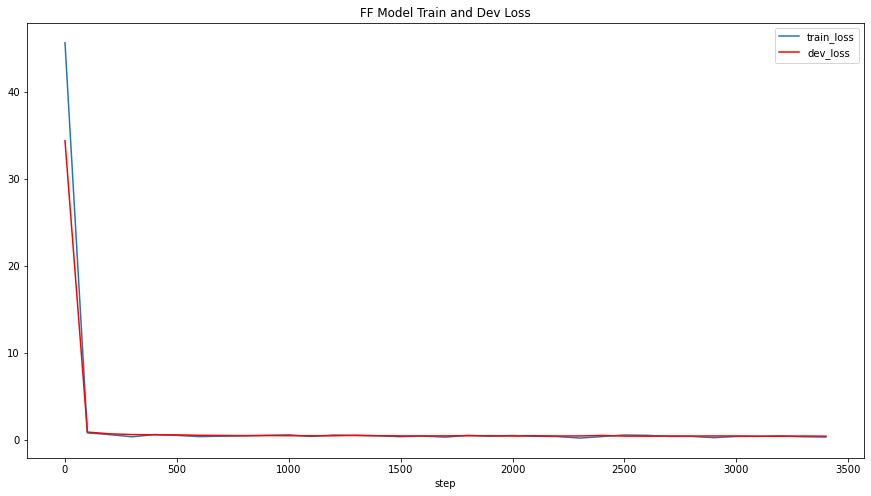

In [16]:
plt.figure(figsize=(15, 8))
plt.title("FF Model Train and Dev Loss")
ax = plt.gca() 
ff_metrics.plot(kind='line',x='step',y='train_loss',ax=ax) 
ff_metrics.plot(kind='line',x='step',y='dev_loss', color='red', ax=ax) 
plt.show()

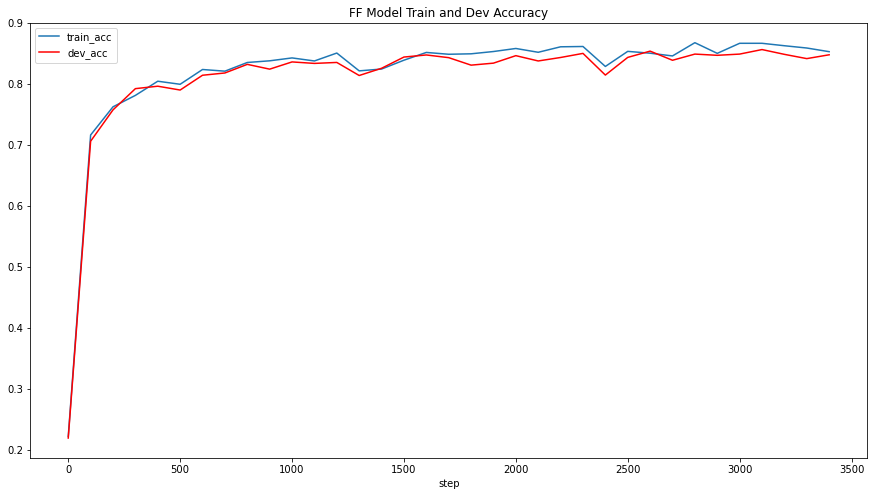

In [21]:
plt.figure(figsize=(15, 8))
plt.title("FF Model Train and Dev Accuracy")
ax = plt.gca()
ff_metrics.plot(kind='line',x='step',y='train_acc',ax=ax) 
ff_metrics.plot(kind='line',x='step',y='dev_acc', color='red', ax=ax) 
plt.show()

Does the loss graph tell you anything? Do you need to train for more steps? Should you train for less? These kinds of plots can tell you a lot about your model!

### 2.2 Basic CNN Model
Now, let’s to the same for the cnn model.
This model still needs to be implemented! Make sure you have finished the coding portion for the CNN model, and have trained the model before you plot things.
Does the plot look correct? It might tell you something about which hyperparameters you want to change (learning rate, batch size, number of steps) from the Feedforward Model setting! You might notice that this graph is quite a bit smoother than the ff model. This model takes many more steps to train than the FF model!
Be sure to plot the losses of your best cnn model (The version you’re submitting) here before you turn the notebook in!

In [29]:
cnn_metrics = pd.read_csv('./cnn-logs.csv') # TODO: point this to the correct log file!

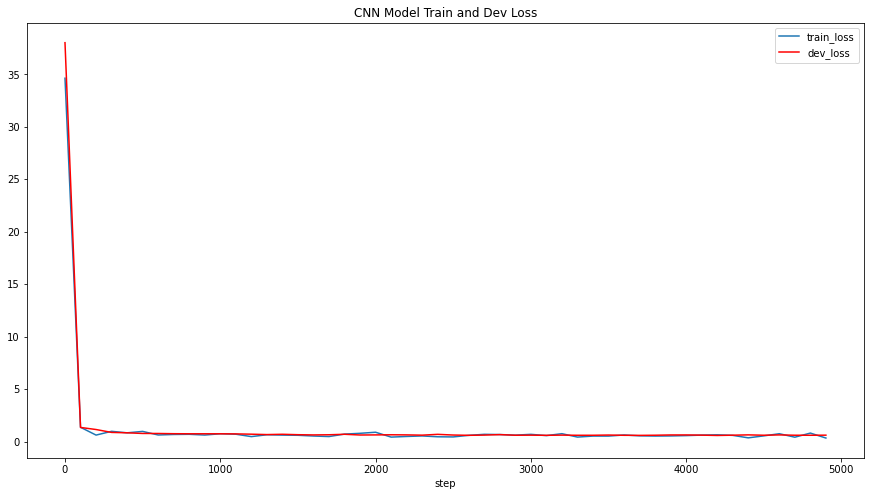

In [30]:
plt.figure(figsize=(15, 8))
plt.title("CNN Model Train and Dev Loss")
ax = plt.gca() 
cnn_metrics.plot(kind='line',x='step',y='train_loss',ax=ax) 
cnn_metrics.plot(kind='line',x='step',y='dev_loss', color='red', ax=ax) 
plt.show()

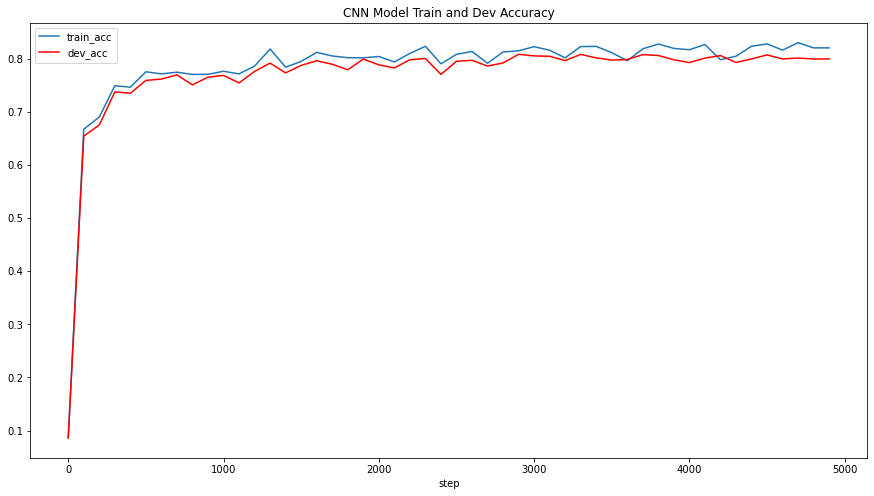

In [31]:
plt.figure(figsize=(15, 8))
plt.title("CNN Model Train and Dev Accuracy")
ax = plt.gca()
cnn_metrics.plot(kind='line',x='step',y='train_acc',ax=ax) 
cnn_metrics.plot(kind='line',x='step',y='dev_acc', color='red', ax=ax) 
plt.show()

### 2.3 Best Model
Now, do the same for the best model (The model you create from scratch!)

Again, you might find it helpful to use this code to examine your model as you debug it and try to boost it’s performance.

Be sure to plot the losses of your best model (The model you’re submitting) here before you turn the notebook in!

In [ ]:
best_metrics = pd.read_csv('./best/best.csv') # TODO: point this to the correct log file!

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Best Model Train and Dev Loss")
### TODO: Best Model Train and Dev Loss

plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Best Model Train and Dev Accuracy")
### TODO: Best Model Train and Dev Accuracy 

plt.show()

### 3. Visualizing Hyperparameter Search
You might have noticed that these models, especially the more complex ones, have tons of hyper- parameters!

In this next section of visualization, we’re going to visualize the effects of specific hyperparameters. Namely, we’re going to be performing a hyperparameter sweep over certain hyperparameters.

To do this, you should freeze all hyperparameters except one. We will then choose a range of values for the one unfrozen hyperparameter. We’ll train an individual model for each value of the range, and then store it’s performance on held out development data.

Once we have dev accuracy for each setting, we can plot it and examine the learning trends as we sweep over that hyperparameters.

Ideally, if we have chosen an effective range, we should see something of an upside-down “U” shape, indicating that we have pushed the hyperparameter to either extreme where it starts to hurt performance, and we might have found something of an optimal value.

Of course, this upside-down “U” and it’s maximum value might only be true in the setting where all of our other hyperparameters are frozen. If we change those, then the sweep we just did might not be correct anymore. However, if we’ve chosen good values to freeze our other hyperparameters with, then we should learn something about the hyperparameter we’re examining.

Note: You will be training a lot of models in this section. If you set up the sweeps correctly, running them should take a while. You might want to leave some time to run these experiments (go grab lunch or a coffee after you kick them off).

You can do this part a number of ways. The easiest way is write a script that runs main.py multiple times and passes in a different value for the hyperparameter in the command line arguments. Then you can manually grab look at performance of each model from it’s output, and plot that in this notebook. This also allows you to save each model in a different spot, so you always have the best model after a sweep. This is nice, because now you don’t have to retrain the model to run it on test data!

Another way is to build a training loop in the cells below, and just run through that loop for each value of the hyperparameter. This might be a bit more work, but now you can directly store the dev accuracy of each run in the notebook, which migth make it easier to plot. It’s up to you!

Also, please label your plots, so we know what we’re looking at! 

3.1 Feed Forward Learning Rate Sweep.

Let’s examine the effect of increasing and decreasing the initial learning rate. Train a model for each learning rate value, and store the dev accuracy for each, then plot them below.

Make sure that you freeze all other hyperparameters of the model to something reasonable, so that the trends you observe are informative!

In [ ]:
# e.g. learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
simple_ff_metrics = pd.read_csv('./3.1/results.csv')
plt.figure(figsize=(15, 8))
plt.title("FF Model Learning Rate Sweep")
ax = plt.gca()
# learning rate represented as 10^(-x) on the x-axis 
simple_ff_metrics.plot(kind='line',x='learning_rate',y='dev_acc', ax=ax) plt.show()
# Optimal Learning rate is 10^(-4)

### 3.2 CNN Number of Channels Sweep

Now, let’s take a look at how choice of channel size for conv1 affects the CNN model we’ve im- plemented. Once again, freeze the other hyperparameters, and train a new CNN model for each channel size that you think should be swept over.

The CNN Model should take a while to train, so you don’t pick too dense of a set. Additionally, the larger this value is, the longer the model takes to train. This is another tradeoff we need to keep in mind. We don’t want to select a value that takes too long to train! So it’s okay for us to examine hyperparameters that range from too small to learn to too large to train efficiently, even though we won’t get the “U-shape” we desire!
Plot the results of dev accuracy.

In [ ]:
# e.g. number_of_channels = [10, 30, 50, 70, 90, 110, 130]
simple_cnn_metrics = pd.read_csv('./3.2/simple-cnn-result.csv')
plt.figure(figsize=(15, 8))
plt.title("Simple CNN Model Conv1 Channel Size Sweep")
ax = plt.gca() 
simple_cnn_metrics.plot(kind='line',x='num_channels',y='dev_acc', ax=ax) 
plt.show()

###3.3 Best Model Sweep

Let’s also examine the effect of some hyperparameters of the model you created for this task!

Pick two hyperparameters in your model and perform separate sweeps on them. You should plot at least two graphs below! You can pick any hyperparameters you’d like. Try to pick ones that you are the most curious about, and examine the behavior.

Can you learn anything new about these hyperparameters, and what valid values for them are?

###3.3.1 Hyperparameter 1

In [ ]:
 # e.g. number_of_linear_features_in_1st_fully_connected_layer = [10, 30, 50, 70, 90, 110, 130]
best_linear_metrics = pd.read_csv('./3.3/best-linear-features-result.csv') 
plt.figure(figsize=(15, 5))
plt.title("Best Model FC1 Linear Feature Size Sweep")
ax = plt.gca() 
best_linear_metrics.plot(kind='line',x='num_linear-features',y='dev_acc', ax=ax) 
plt.show()
# Valid range between 10 and infinity
# The larger the feature size, the better until the number of linear-features is larger than the
# number of inputs into the linear layer. There is also a large time tradeoff.

###3.3.2 Hyperparameter 2

In [ ]:
# 2nd_Max_Pooling_Layer_Kernel_size = [1, 2, 3, 4, 5, 6]
best_maxpool_metrics = pd.read_csv('./3.3/best-pool2-result.csv')
plt.figure(figsize=(15, 5))
plt.title("Best Model Second Max Pooling Layer Kernel Size Sweep") 
ax = plt.gca() 
best_maxpool_metrics.plot(kind='line',x='maxpool',y='dev_acc', ax=ax) 
plt.show()
# Valid range between 1 and 6
# The smaller than Max Pooling Kernel, the better the development accuracy
# However, this might not mean that the model will perform better on the test set
# since the model could be just overfitting on the training and development sets